In [1]:
import librosa
import librosa.display
import IPython.display
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

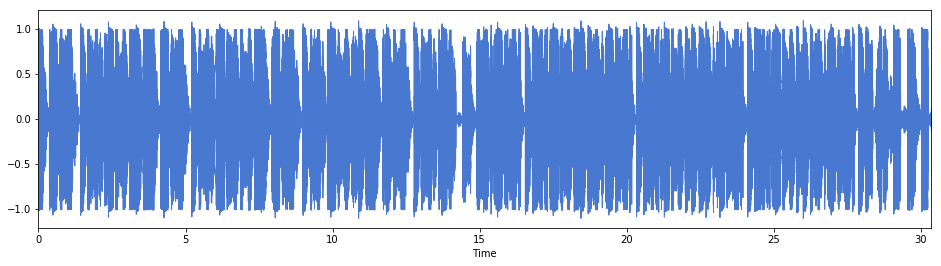

In [2]:
y, sr = librosa.load("/home/mars/musictools/loop.wav")
plt.figure(figsize=(16,4))
plt.subplot(1,1,1)
librosa.display.waveplot(y, sr=sr)

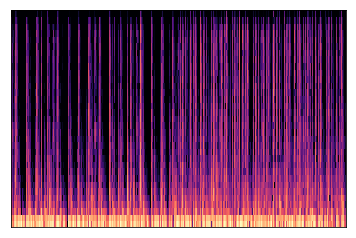

In [3]:
# How about something more advanced?  Let's decompose a spectrogram with NMF, and then resynthesize an individual component
D = librosa.stft(y, n_fft=64)

# Separate the magnitude and phase
S, phase = librosa.magphase(D)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max))

In [4]:
# let's make a filter
fc = 0.5  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
b = 0.2  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)
 
# Compute sinc filter.
h = np.sinc(2 * fc * (n - (N - 1) / 2.))
 
# Compute Blackman window.
w = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + \
    0.08 * np.cos(4 * np.pi * n / (N - 1))
 
# Multiply sinc filter with window.
h = h * w
 
# Normalize to get unity gain.
h = h / np.sum(h)

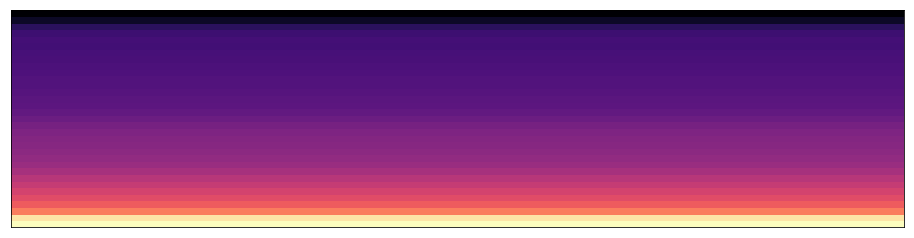

In [60]:
newspectrum = S.copy()
means = np.median(newspectrum, axis=1)
newspectrum = np.tile(np.array([means]), (newspectrum.shape[1], 1)).transpose()

#newspectrum = librosa.decompose.nn_filter(newspectrum, axis=1)
#gradient = np.gradient(newspectrum, axis=1)
#np.apply_along_axis(lambda m: np.average(m), axis=0, arr=newspectrum)
plt.figure(figsize=(16,4))
plt.subplot(1,1,1)
librosa.display.specshow(librosa.amplitude_to_db(newspectrum, ref=np.max))


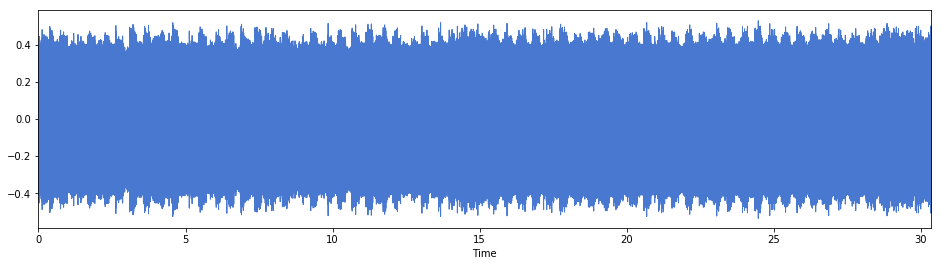

In [61]:
# convert back to sound, eh?
y_k = librosa.istft(newspectrum * phase)
plt.figure(figsize=(16,4))
plt.subplot(1,1,1)
librosa.display.waveplot(y_k, sr=sr)
IPython.display.Audio(data=y_k, rate=sr)